In [1]:
import os

import numpy as np
import pandas as pd
from IPython.display import display

# Check if the environment is activated
if "CONDA_DEFAULT_ENV" in os.environ:
    print(f"Environment '{os.environ['CONDA_DEFAULT_ENV']}' is activated.")
else:
    print("No specific environment is activated.")

np.random.seed(42)

Environment 'research' is activated.


In [2]:
# # Load the Boston dataset
# dataset = "boston"
# raw_df = pd.read_csv("data/boston.csv")
# target = ["MEDV"]
# features = raw_df.columns.drop(target)
# target, features

In [3]:
# # Load the store sales dataset
# dataset = "store_sales"
# excel_file = pd.ExcelFile("data/store_sales.xlsx")
# sheet_names = excel_file.sheet_names

# # Read the data
# raw_df = pd.read_excel(excel_file, sheet_name=sheet_names[2])  # 2, 9
# iri_key_counts = raw_df["IRI_KEY"].value_counts()
# iri_keys = iri_key_counts[iri_key_counts > 300].index


# target = ["Total.Volume"]
# features = ["F", "D", "Unit.Price"]

# raw_df = raw_df[raw_df["IRI_KEY"] == iri_keys[0]]

# sheet_names, iri_keys

In [4]:
# Load the California housing dataset
from sklearn.datasets import fetch_california_housing

dataset = "california"
housing = fetch_california_housing()
target = housing.target_names
features = housing.feature_names
raw_df = pd.concat(
    [
        pd.DataFrame(housing.data, columns=housing.feature_names),
        pd.DataFrame(housing.target, columns=housing.target_names),
    ],
    axis=1,
)
target, features

(['MedHouseVal'],
 ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'])

In [5]:
# # Load the soybean dataset
# dataset = "soybean"
# raw_df = pd.read_excel("data/soybean.xlsx")
# # X = raw_df.values[:-1, [5, 6, 15, 16, 17, 26,
# #                         34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]  # 9 check yield 12 rm band
# # y = raw_df.values[:-1, 11]
# X = raw_df.iloc[:-1, [5, 6, 15, 16, 17, 26,
#                   34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]
# y = raw_df.iloc[:-1, [11]]
# X.shape, y.shape

In [6]:
# # Load LengthOfStay
# dataset = "LengthOfStay"
# raw_df = pd.read_csv("data/LengthOfStay.csv")
# raw_df = raw_df.drop(columns=["eid", "vdate", "discharged"])
# target = ["lengthofstay"]
# features = raw_df.columns.drop(target)
# target, features

In [7]:
# # Load HospitalStay
# dataset = "HospitalStay"
# raw_df = pd.read_csv("data/Healthcare_Investments_and_Hospital_Stay.csv")
# target = ["Hospital_Stay"]
# features = raw_df.columns.drop(target)
# target, features

In [8]:
import time

output_folder = f"output/{dataset}_{time.strftime('%F_%T')}"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
if not os.path.exists(f"{output_folder}/models"):
    os.makedirs(f"{output_folder}/models")

X = raw_df[features]
y = raw_df[target]

display(f"output: {output_folder}", X.describe(), y.describe())

'output: output/california_2025-02-26_20:09:36'

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [9]:
# # Remove Outliers
# def remove_outliers(df, threshold=3):
#     z_scores = np.abs((df - df.mean()) / df.std())
#     return df[(z_scores < threshold).all(axis=1)]
# filtered_train_data = train_data
# for col in train_data.columns:
#     value_counts = train_data[col].value_counts().sort(by="count")
#     valid = value_counts.filter(pl.col("count") > value_counts["count"].max()/len(value_counts))[col]
#     filtered_train_data = filtered_train_data.filter(pl.col(col).is_in(valid))
# display(filtered_train_data, filtered_train_data.describe())

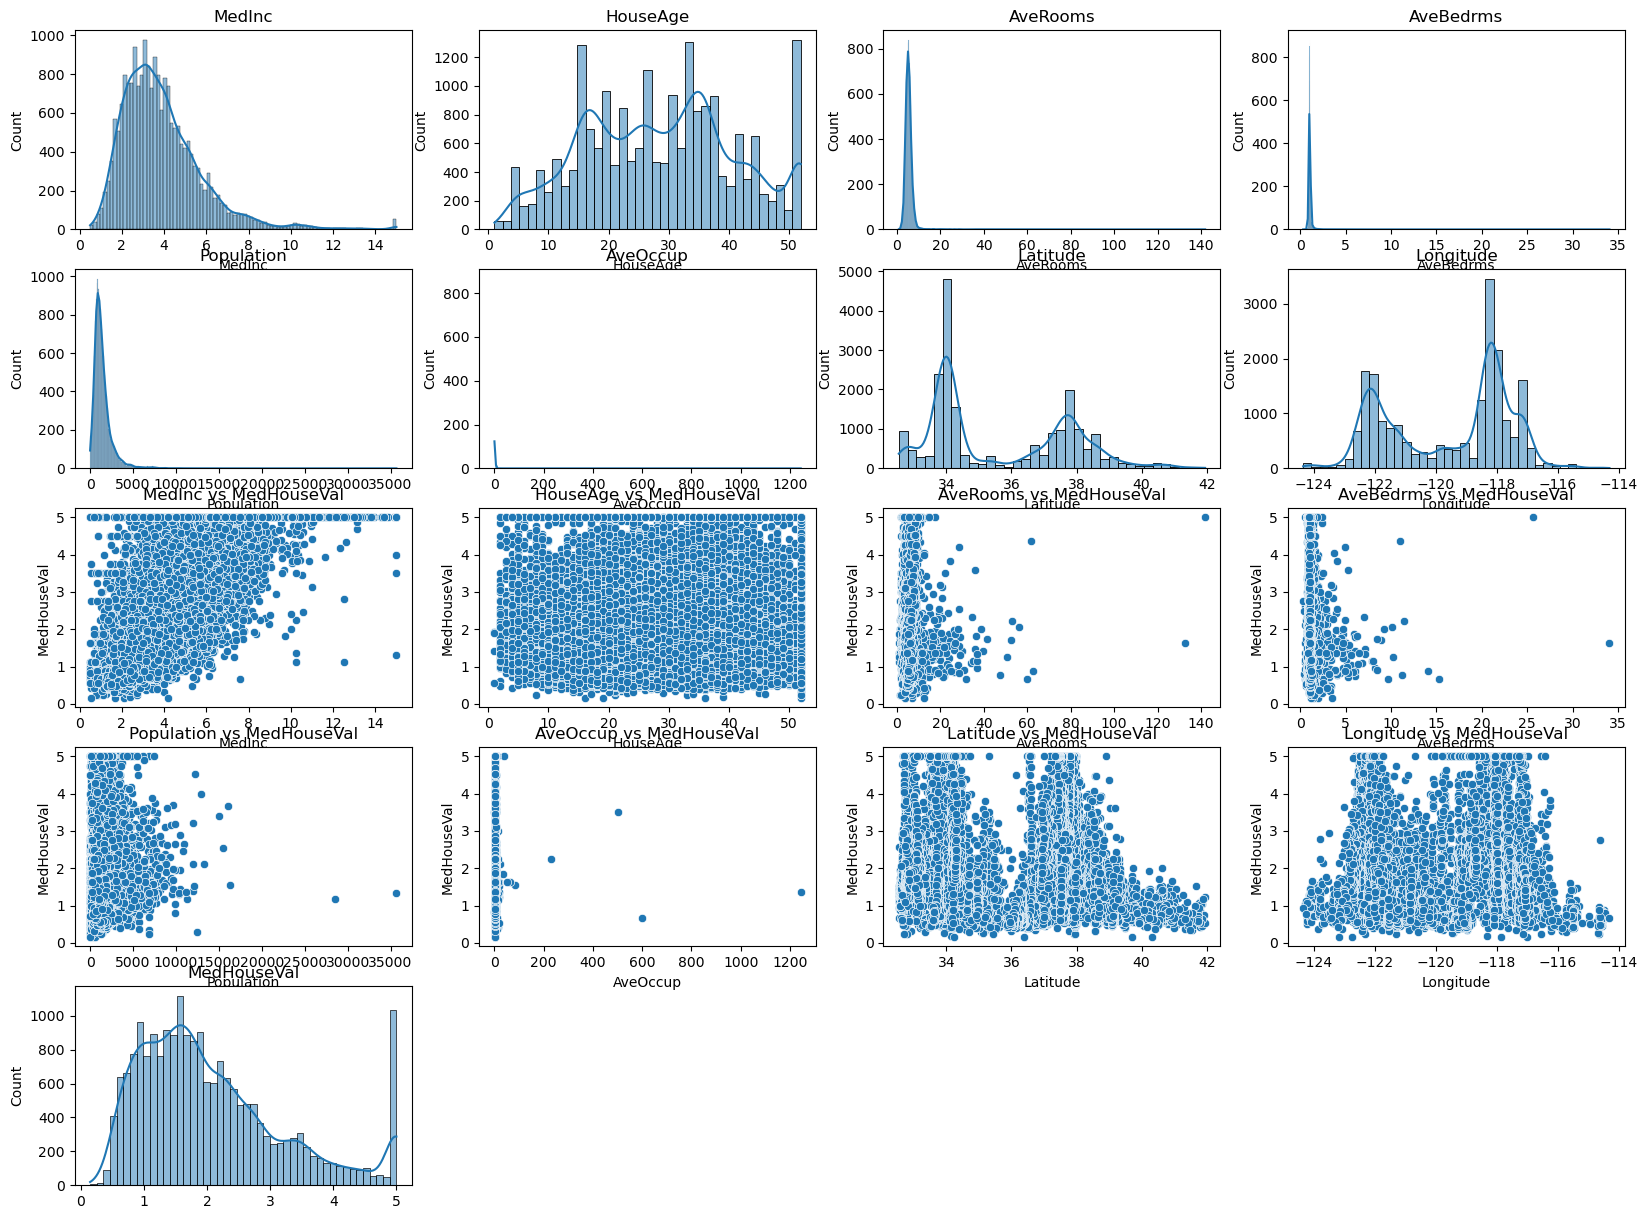

In [10]:
# Plot data
import matplotlib.pyplot as plt
import seaborn as sns


def plot_data(X, y, cols=4):
    fig, axs = plt.subplots(
        (X.shape[1]+X.shape[1]*y.shape[1] + y.shape[1]+cols-1)//cols, cols, figsize=(20, 15))
    axs = axs.flatten()

    a = 0
    for i, col in enumerate(X.columns):
        data = X[col].to_numpy()
        ax = axs[a+i]
        sns.histplot(data, kde=True, ax=ax)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.tick_params(axis="both", which="major")
        ax.tick_params(axis="both", which="minor")
    a += i + 1
    for i, col in enumerate(X.columns):
        data = X[col].to_numpy()
        for j, ycol in enumerate(y.columns):
            ax = axs[a+i+j*y.shape[1]]
            sns.scatterplot(x=data, y=y[ycol], ax=ax)
            ax.set_title(f"{col} vs {ycol}")
            ax.set_xlabel(col)
            ax.set_ylabel(ycol)
    a += i + 1
    for i, col in enumerate(y.columns):
        data = y[col].to_numpy()
        ax = axs[a+i]
        sns.histplot(data, kde=True, ax=ax)
        ax.set_title(col)
    a += i+1
    for j in range(a, len(axs)):
        fig.delaxes(axs[j])

    # fig.tight_layout()
    return fig
    
fig = plot_data(X, y)
fig.savefig(f"{output_folder}/data.png")
fig.show()

In [11]:
# Define search
from optuna.integration.sklearn import OptunaSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    TargetEncoder,
)

CATEGORICAL_PREPROCESSORS = {
    "drop": "drop",
    "ordinal": OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
    "one_hot": OneHotEncoder(
        handle_unknown="ignore", max_categories=20, sparse_output=False
    ),
    "target": TargetEncoder(target_type="continuous"),
}

SCALERS = {
    "identity": None,
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "quantile": QuantileTransformer(),
}

search_params = {
    "cv": 5,
    "n_jobs": -1,  # -1,
    "n_trials": 5, # 1
    # "n_trials": None,
    "random_state": 42,
    "return_train_score": True,
    "scoring": "r2",  # r2
    # "timeout": 10,
    # "timeout": None,
    "verbose": 0,
}


def search(
    model,
    param_grid={},
    categorical_preprocessor="drop",
    scaler="identity",
    search_params=search_params,
):
    search_params = search_params.copy()
    # search_params["n_trials"] = int(4**len(param_grid))

    numerical_features = X.select_dtypes(include=["number"]).columns
    categorical_features = X.select_dtypes(include=["object", "category"]).columns
    preprocessor = ColumnTransformer(
        [
            ("numerical", "passthrough", numerical_features),
            (
                "categorical",
                CATEGORICAL_PREPROCESSORS[categorical_preprocessor],
                categorical_features,
            ),
        ]
    )

    return OptunaSearchCV(
        Pipeline(
            [
                ("categorical_preprocessor", preprocessor),
                ("scaler", SCALERS[scaler]),
                ("model", model),
            ]
        ),
        {f"model__{k}": v for k, v in param_grid.items()},
        **search_params,
    )

In [12]:
# Define search grids
from optuna.distributions import (
    CategoricalDistribution,
    FloatDistribution,
    IntDistribution,
)

mlp_sk_param_grid = {
    "learning_rate_init": FloatDistribution(1e-2, 1e-1, log=True),
    "max_iter": IntDistribution(100, 100, log=True),
    "early_stopping": CategoricalDistribution([False]),
    "n_iter_no_change": IntDistribution(100, 100),
}

mlp_TrANN_param_grid = {
    "learning_rate_init": FloatDistribution(1e-2, 1e-1, log=True),
    "max_iter": IntDistribution(200, 200, log=True),
}

In [13]:
# from models import MLP, FONN1, FONN2, TREENN1, TREENN2
from models.models_sklearn import (
    Tree,
    Ensemble,
    MLP as MLP_sk,
    FONN1 as FONN1_sk,
    FONN2 as FONN2_sk,
    TREENN1 as TREENN1_sk,
    TREENN2 as TREENN2_sk,
)
from models.models_TrANN import (
    FONN1 as FONN1_TrANN,
    FONN2 as FONN2_TrANN,
    FONN3 as FONN3_TrANN,
    TREENN1 as TREENN1_TrANN,
    TREENN2 as TREENN2_TrANN,
    TREENN3 as TREENN3_TrANN,
)

models = {}

num_trees_input = 5
num_trees_hidden = 5
hidden_nodes = [10]
# hidden_nodes = [5, 10]

# categorical_preprocessor = ["drop", "target"]
# scalers = ["identity", "standard"]
scalers = ["identity"]
categorical_preprocessor = ["drop"]

models["Tree"] = search(Tree())
for hn in hidden_nodes:
    models[f"Ensemble_sk {hn}"] = search(Ensemble(hn))
    for c in categorical_preprocessor:
        for s in scalers:
            sk_args = (mlp_sk_param_grid, c, s)
            trann_args = (mlp_TrANN_param_grid, c, s)
            models[f"MLP_sk_{c}_{s} {hn}"] = search(MLP_sk(hn), *sk_args)
            models[f"FONN1_sk_{c}_{s} {num_trees_input} {hn}"] = search(
                FONN1_sk(num_trees_input, num_trees_input + hn), *sk_args
            )
            models[f"FONN2_sk_{c}_{s} {num_trees_hidden} {hn}"] = search(
                FONN2_sk(num_trees_hidden, num_trees_hidden + hn), *sk_args
            )
            models[f"TREENN1_sk_{c}_{s} {hn}"] = search(
                TREENN1_sk(1 + hn), *sk_args
            )
            models[f"TREENN2_sk_{c}_{s} {hn}"] = search(
                TREENN2_sk(1 + hn), *sk_args
            )
            models[f"FONN1_TrANN_{c}_{s} {num_trees_input} {hn}"] = search(
                FONN1_TrANN(hn, num_trees_input), *trann_args
            )
            models[f"FONN2_TrANN_{c}_{s} {num_trees_hidden} {hn}"] = search(
                FONN2_TrANN(hn, num_trees_hidden), *trann_args
            )
            models[f"FONN3_TrANN_{c}_{s} {num_trees_hidden} {hn}"] = search(
                FONN3_TrANN(hn, num_trees_hidden), *trann_args
            )
            models[f"TREENN1_TrANN_{c}_{s} {hn}"] = search(
                TREENN1_TrANN(hn), *trann_args
            )
            models[f"TREENN2_TrANN_{c}_{s} {hn}"] = search(
                TREENN2_TrANN(hn), *trann_args
            )
            models[f"TREENN3_TrANN_{c}_{s} {hn}"] = search(
                TREENN3_TrANN(hn), *trann_args
            )

display(models)

/tmp/ipykernel_185779/1839918865.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_185779/1839918865.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_185779/1839918865.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_185779/1839918865.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_185779/1839918865.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_185779/1839918865.py:69: ExperimentalWarning: OptunaSearchCV is experi

{'Tree': OptunaSearchCV(cv=5,
                estimator=Pipeline(steps=[('categorical_preprocessor',
                                           ColumnTransformer(transformers=[('numerical',
                                                                            'passthrough',
                                                                            Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
        'Latitude', 'Longitude'],
       dtype='object')),
                                                                           ('categorical',
                                                                            'drop',
                                                                            Index([], dtype='object'))])),
                                          ('scaler', None), ('model', Tree())]),
                n_jobs=-1, n_trials=5, param_distributions={}, random_state=42,
                return_train_score=True, scoring='r2'),
 'Ens

In [ ]:
from sklearn.metrics import mean_squared_error

# Train and evaluate models
cv_results = {}
results = []

result_columns = [
    "model",
    "mean_fit_time",
    "mean_score_time",
    "mean_train_score",
    "mean_test_score",
    "mse",
]


def fit_model(name, model, X, y):
    print(f"Fitting {name}...")
    model.fit(X, y.to_numpy().ravel())
    result = model.cv_results_
    cv_results[name] = result
    return {
        "model": name,
        **{col: result[col][model.best_index_] for col in result},
        "mse": mean_squared_error(y, model.predict(X)),
        "params": str(model.best_params_),
    }


for name, model in models.items():
    results.append(fit_model(name, model, X, y))

results = pd.DataFrame(results)
results = results[result_columns]
results.to_csv(f"{output_folder}/results.csv", index=False)

[I 2025-02-26 20:10:44,517] A new study created in memory with name: no-name-7c31df35-2455-4541-ab61-97bfe4f45f70


Fitting Tree...


[I 2025-02-26 20:10:45,458] Trial 0 finished with value: 0.3468104223264715 and parameters: {}. Best is trial 0 with value: 0.3468104223264715.
[I 2025-02-26 20:10:45,461] Trial 4 finished with value: 0.35145842658595905 and parameters: {}. Best is trial 4 with value: 0.35145842658595905.
[I 2025-02-26 20:10:45,529] Trial 1 finished with value: 0.1286081510138105 and parameters: {}. Best is trial 4 with value: 0.35145842658595905.
[I 2025-02-26 20:10:45,595] Trial 2 finished with value: 0.2533667166486511 and parameters: {}. Best is trial 4 with value: 0.35145842658595905.
[I 2025-02-26 20:10:45,598] Trial 3 finished with value: 0.28408253061709676 and parameters: {}. Best is trial 4 with value: 0.35145842658595905.
[I 2025-02-26 20:10:45,833] A new study created in memory with name: no-name-65eaecb0-9d4a-4171-8e85-4152ffd7bb45


Fitting Ensemble_sk 10...


[I 2025-02-26 20:10:53,886] Trial 3 finished with value: 0.6242941213876754 and parameters: {}. Best is trial 3 with value: 0.6242941213876754.
[I 2025-02-26 20:10:53,949] Trial 0 finished with value: 0.61658078707585 and parameters: {}. Best is trial 3 with value: 0.6242941213876754.
[I 2025-02-26 20:10:54,348] Trial 1 finished with value: 0.6113528446355755 and parameters: {}. Best is trial 3 with value: 0.6242941213876754.
[I 2025-02-26 20:10:54,631] Trial 4 finished with value: 0.6221645926840675 and parameters: {}. Best is trial 3 with value: 0.6242941213876754.
[I 2025-02-26 20:10:55,011] Trial 2 finished with value: 0.6226238970683095 and parameters: {}. Best is trial 3 with value: 0.6242941213876754.
[I 2025-02-26 20:10:57,114] A new study created in memory with name: no-name-b2fb80a2-a698-454e-8771-f62d45f81a01


Fitting MLP_sk_drop_identity 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting FONN1_sk_drop_identity 5 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting FONN2_sk_drop_identity 5 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting TREENN1_sk_drop_identity 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting TREENN2_sk_drop_identity 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting FONN1_TrANN_drop_identity 5 10...


[I 2025-02-26 20:32:30,232] Trial 2 finished with value: -0.10199557251448202 and parameters: {'model__learning_rate_init': 0.029796077021237738, 'model__max_iter': 200}. Best is trial 2 with value: -0.10199557251448202.
[I 2025-02-26 20:32:31,577] Trial 0 finished with value: -0.10819328825020272 and parameters: {'model__learning_rate_init': 0.04007766606267377, 'model__max_iter': 200}. Best is trial 2 with value: -0.10199557251448202.
[I 2025-02-26 20:32:32,082] Trial 3 finished with value: -0.09459810572593849 and parameters: {'model__learning_rate_init': 0.05476248628034003, 'model__max_iter': 200}. Best is trial 3 with value: -0.09459810572593849.
[I 2025-02-26 20:32:32,672] Trial 1 finished with value: -0.10737191204113934 and parameters: {'model__learning_rate_init': 0.038009596046987656, 'model__max_iter': 200}. Best is trial 3 with value: -0.09459810572593849.
[I 2025-02-26 20:32:33,057] Trial 4 finished with value: -0.09144594764253929 and parameters: {'model__learning_rate_i

Fitting FONN2_TrANN_drop_identity 5 10...


[I 2025-02-26 20:34:01,335] Trial 0 finished with value: 0.4530591268136209 and parameters: {'model__learning_rate_init': 0.08080445264394752, 'model__max_iter': 200}. Best is trial 0 with value: 0.4530591268136209.
[I 2025-02-26 20:34:01,634] Trial 4 finished with value: 0.4453183795433156 and parameters: {'model__learning_rate_init': 0.021681114191195873, 'model__max_iter': 200}. Best is trial 0 with value: 0.4530591268136209.
[I 2025-02-26 20:34:02,118] Trial 3 finished with value: 0.4580226121751007 and parameters: {'model__learning_rate_init': 0.08251383600744305, 'model__max_iter': 200}. Best is trial 3 with value: 0.4580226121751007.
[I 2025-02-26 20:34:02,890] Trial 1 finished with value: 0.45515200537670364 and parameters: {'model__learning_rate_init': 0.05417495721801147, 'model__max_iter': 200}. Best is trial 3 with value: 0.4580226121751007.
[I 2025-02-26 20:34:03,770] Trial 2 finished with value: 0.45530734932906947 and parameters: {'model__learning_rate_init': 0.041725368

Fitting FONN3_TrANN_drop_identity 5 10...


[I 2025-02-26 20:35:27,737] Trial 4 finished with value: -1.887845005795489 and parameters: {'model__learning_rate_init': 0.011168687101221694, 'model__max_iter': 200}. Best is trial 4 with value: -1.887845005795489.
[I 2025-02-26 20:35:28,009] Trial 1 finished with value: -1.8421617518562186 and parameters: {'model__learning_rate_init': 0.012366964198635805, 'model__max_iter': 200}. Best is trial 1 with value: -1.8421617518562186.
[I 2025-02-26 20:35:28,460] Trial 0 finished with value: -1.8650170626594023 and parameters: {'model__learning_rate_init': 0.07531105147972914, 'model__max_iter': 200}. Best is trial 1 with value: -1.8421617518562186.
[I 2025-02-26 20:35:29,494] Trial 2 finished with value: -1.8810898562821865 and parameters: {'model__learning_rate_init': 0.013960617903066264, 'model__max_iter': 200}. Best is trial 1 with value: -1.8421617518562186.
[I 2025-02-26 20:35:30,157] Trial 3 finished with value: -1.851454056762782 and parameters: {'model__learning_rate_init': 0.021

Fitting TREENN1_TrANN_drop_identity 10...


[I 2025-02-26 20:36:23,803] Trial 2 finished with value: -0.10256461329526659 and parameters: {'model__learning_rate_init': 0.09355604156833372, 'model__max_iter': 200}. Best is trial 2 with value: -0.10256461329526659.
[I 2025-02-26 20:36:24,254] Trial 3 finished with value: -0.09959493054532009 and parameters: {'model__learning_rate_init': 0.03983724134911105, 'model__max_iter': 200}. Best is trial 3 with value: -0.09959493054532009.
[I 2025-02-26 20:36:24,639] Trial 1 finished with value: -0.10250707526809522 and parameters: {'model__learning_rate_init': 0.01119029767773088, 'model__max_iter': 200}. Best is trial 3 with value: -0.09959493054532009.
[I 2025-02-26 20:36:24,687] Trial 4 finished with value: -0.10175153487621977 and parameters: {'model__learning_rate_init': 0.04400887592354834, 'model__max_iter': 200}. Best is trial 3 with value: -0.09959493054532009.
[I 2025-02-26 20:36:24,736] Trial 0 finished with value: -0.09701050325945823 and parameters: {'model__learning_rate_ini

Fitting TREENN2_TrANN_drop_identity 10...


[I 2025-02-26 20:37:09,305] Trial 2 finished with value: 0.39756055667973006 and parameters: {'model__learning_rate_init': 0.016775822501399203, 'model__max_iter': 200}. Best is trial 2 with value: 0.39756055667973006.
[I 2025-02-26 20:37:09,503] Trial 3 finished with value: 0.4366073326761386 and parameters: {'model__learning_rate_init': 0.08844869353994164, 'model__max_iter': 200}. Best is trial 3 with value: 0.4366073326761386.
[I 2025-02-26 20:37:09,670] Trial 0 finished with value: 0.40822323346491113 and parameters: {'model__learning_rate_init': 0.013559151226670868, 'model__max_iter': 200}. Best is trial 3 with value: 0.4366073326761386.
[I 2025-02-26 20:37:10,989] Trial 1 finished with value: 0.3908168106895656 and parameters: {'model__learning_rate_init': 0.04630456806526674, 'model__max_iter': 200}. Best is trial 3 with value: 0.4366073326761386.
[I 2025-02-26 20:37:11,945] Trial 4 finished with value: 0.4289654172275662 and parameters: {'model__learning_rate_init': 0.0296191

Fitting TREENN3_TrANN_drop_identity 10...


In [ ]:
display(
    results,
    results.sort_values(by="mean_test_score", ascending=False),
    results.sort_values(by="mean_train_score", ascending=False),
    results.sort_values(by="mse", ascending=True),
)

In [ ]:
pd.DataFrame({name: model.best_params_ for name,
             model in models.items()}).transpose()

In [ ]:
# Predictions

predictions = pd.DataFrame(
    {name: model.best_estimator_.predict(X).ravel() for name, model in models.items()}
)
predictions = pd.concat([y, predictions], axis=1)
predictions.to_csv(f"{output_folder}/predictions.csv", index=False)
predictions.describe().to_csv(f"{output_folder}/predictions_stats.csv", index=True)

display(predictions, predictions.describe())

In [ ]:
# Plot Predictions
fig = plot_data(predictions, y)
fig.savefig(f"{output_folder}/predictions.png")

In [ ]:
# Plot all models

def plot_loss(model, ax1, ax2, label):
    ax1.plot(model.loss_curve_, label=label)
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Loss")
    ax1.grid(True)

    ax2.plot(model.loss_curve_, label=label)
    ax2.set_yscale("log")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Loss")
    ax2.grid(True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        plot_loss(model.best_estimator_["model"], ax1, ax2, label=model_name)

ax1.set_xlabel("Iterations")
ax1.set_ylabel("Loss")
ax1.set_title("All models")
ax1.legend()
ax1.grid(True)

ax2.set_yscale("log")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Loss")
ax2.set_title("All models")
ax2.legend()
ax2.grid(True)

fig.tight_layout()
fig.savefig(f"{output_folder}/models/models.png")
fig.show()

In [ ]:
# Plot model groups

plot_groups = {}
for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        keys = model_name.split(" ")[0].split("_") + list(enumerate(model_name.split(" ")[-1:0:-1]))
        for key in keys:
            if key not in plot_groups:
                plot_groups[key] = plt.subplots(1, 2, figsize=(14, 6))
            fig, (ax1, ax2) = plot_groups[key]
            plot_loss(model.best_estimator_["model"], ax1, ax2, model_name)

for group, plot in plot_groups.items():
    fig, (ax1, ax2) = plot
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Loss")
    ax1.set_title(group)
    ax1.legend()
    ax1.grid(True)

    ax2.set_yscale("log")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Loss")
    ax2.set_title(group)
    ax2.legend()
    ax2.grid(True)

    fig.tight_layout()
    fig.savefig(f"{output_folder}/models/group_{group}.png")
    fig.show()

In [ ]:
# Plot individual models

for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        plot_loss(model.best_estimator_["model"], ax1, ax2, model_name)
        ax1.set_title(model_name)
        ax2.set_title(model_name)
        fig.tight_layout()
        fig.savefig(f"{output_folder}/models/{model_name}.png")
        fig.show()